In [7]:
import tweepy
import pandas as pd
import authentification
import datetime

In [8]:
screen_name = "1O17SQD"
TWEET_MODE = 'extended'
api = authentification.credentials()

def get_tweets(screen_name, api):
    """
    Retrieves tweets from the specified user using the specified Twitter API.

    Parameters
    ----------
    screen_name : str
        Screen name of the user whose tweets are to be retrieved.
    api: tweepy.API
        Twitter API object used to access the user's tweets.

    Returns
    -------
    list of tweepy.models.Status
        List of the user's tweets.
    """
    tweets = api.user_timeline(screen_name=screen_name,
                               # 200 is the maximum number allowed
                               count=200,
                               exclude_replies=False,
                               include_rts=False,
                               # Necessary to keep the full text
                               # otherwise only the first 140 words are extracted
                               tweet_mode=TWEET_MODE
                               )
    return tweets

def get_all_tweets(screen_name, api):
    """
    Retrieves all tweets from the specified user using the specified Twitter API.

    Parameters
    ----------
    screen_name : str
        Screen name of the user whose tweets are to be retrieved.
    api: tweepy.API
        Twitter API object used to access the user's tweets.

    Returns
    -------
    list of tweepy.models.Status
        List of all the user's tweets.
    """
    tweets = get_tweets(screen_name, api)
    all_tweets = []
    all_tweets.extend(tweets)
    oldest_id = tweets[-1].id
    while True:
        tweets = api.user_timeline(screen_name=screen_name,
                                   # 200 is the maximum number allowed
                                   count=200,
                                   exclude_replies=False,
                                   include_rts=False,
                                   max_id=oldest_id - 1,
                                   # Necessary to keep the full text
                                   # otherwise only the first 140 words are extracted
                                   tweet_mode=TWEET_MODE
                                   )
        if not len(tweets):
            break
        oldest_id = tweets[-1].id
        all_tweets.extend(tweets)

    return all_tweets

In [9]:
import re
import unicodedata
from nltk.tokenize import WordPunctTokenizer

In [10]:
def cleaning_tweets(tweets):
    """
    Clean up a tweet by removing links, hashtags, mentions and emoticons.

    Parameters
    ----------
    tweet : str
        Tweet to clean up.

    Returns
    -------
    str
        Tweet cleaned up.
    """
    regex_pattern = re.compile(pattern="["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictograms
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
    tweets = re.sub(regex_pattern, '', tweets)  # replaces the pattern with ''
    tweets = re.sub(pattern, '', tweets)
    tweets = re.sub(r'@[^\s]+', '', tweets)
    tweets = re.sub(r'#[^\s]+', '', tweets)
    # Removes special characters and links
    #tweets = re.sub(r'[^\w\s]', '', tweets)
    tweets = re.sub(r'https?://[A-Za-z0-9./]+', '', tweets)
    # Removes user mentions
    tweets = re.sub(r'@[A-Za-z0-9]+', '', tweets)

    token = WordPunctTokenizer()
    words = token.tokenize(tweets)
    result_words = [x for x in words]
    return " ".join(result_words)

def remove_emojis(tweets):
    text = cleaning_tweets(tweets)
    # Create an empty list to store the cleaned text
    cleaned_text = []

    # Scroll through each character of the text
    for character in text:
        # Use the `category` function of the `unicodedata` library to get the Unicode category of the character
        character_category = unicodedata.category(character)
        # If the character's Unicode category is not "So" (Symbol, Other), add the character to the clean text list
        if character_category != "So":
            cleaned_text.append(character)

    # Join the characters in the cleaned text list into a string and return it
    return "".join(cleaned_text)

In [4]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
remove_emojis("".join(df['tweets_txt']))

c:\Users\fonty\anaconda3\envs\plotly_env\lib\site-packages\spacy\util.py:877: UserWarning: [W095] Model 'fr_core_news_md' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.5.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [16]:
res

,10,15,20,2017,365,abonnésvou,actualiser,actuellementj,adopter,aimer,...,warsj,west,winnin,wolver,worst,youdon,écouter,écrire,épingler,étrange
Doc 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc 95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
print(remove_emojis("".join(df['tweets_txt'])))

je pense qu ' on ne m ' aime pas , mais je ne suis pas sûr  était encore son patronmes relations ( les personnes qui me suivent en gros ) sur LinkedIn explosent , j ' ai pas compris pourquoi mais okla putain de mésaventure que j ' ai vécue hier , it was the worst birthday ever ! je suis littéralement en train de dormir à la gare en attendant mon trainJoyeux anniversaire à moi - même ! on dirait si je passe une journée sans vouloir me foutre en l ' air je meurs écoutez Wolves de Kanye West parce que c ' est juste trop bien en faitc ' était pas ouf complément d ' enquêteon va aller voir ce que ça donne les influvoleurswho needs sorry when there ' s Hennessey ? c ' est à quelle heure complément d ' enquête ? I ' m just bad for youDon ' t fool yourself Your eyes don ' t lie , you ' re much too good to be trueKanye West - Wolves ( Balmain Campaign ) Captain , it ’ s 3 PM il faudrait peut - être que je lise ces livres , ça me permettra au moins d ’ améliorer mon orthographepar contre ça fait

In [11]:
def public_metrics(screen_name, api):
    tweet_source = []
    year = []
    year_month = []
    tweets_txt = []
    nb_retweet = []
    nb_fav = []
    
    for status in get_all_tweets(screen_name, api):
        tweet_source.append(status.source)
        year.append(int(status.created_at.strftime("%Y")))
        year_month.append(status.created_at.strftime("%Y-%m"))
        tweets_txt.append(status.full_text)
        nb_retweet.append(status.retweet_count)
        nb_fav.append(status.favorite_count)
        
    dict_metrics = {'tweet_source': tweet_source, 'year': year,
          'tweets_txt':tweets_txt, 'nb_retweet':nb_retweet,
          'nb_favorite':nb_fav, 'year_month':year_month}
    
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

df = public_metrics(screen_name, api)

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

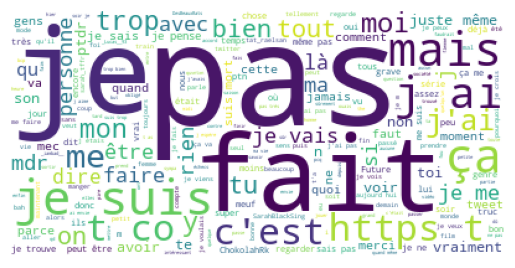

In [123]:
exclure_mots = ['d', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme']
wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 2000).generate(" ".join(df['tweets_txt']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [119]:
from textblob import TextBlob
def processing(text):
    return TextBlob(text).words

'je pense qu\'on ne m\'aime pas, mais je ne suis pas sûr 🤣 https://t.co/dk5WPoK9J1 Chat GPT, Google Bard… : l’intelligence artificielle va-t-elle nous remp... https://t.co/PrWWCjaZKN j\'ai drop quelques projets sur mon github, dans mes langues les plus utilisées j\'ai 70% de CSS 🙄 https://t.co/4UIVtJrAUQ j\'ai regardé inception lors d\'un déplacement pro, j\'ai dû mettre pause plusieurs fois, ce qui est assez chiant, je veux le regarder en one shot ! j\'ai perdu l\'habitude d\'aller au cinéma tous les dimanches soir je ne suis pas sûr d’avoir mangé aujourd’hui et j’y pense seulement maintenant 😔 bien sûr, pourquoi pas tant qu’on y est, trouvons des excuses au racisme https://t.co/j6zsy2uQVp je considère que "se nourrir" n’est pas un fait intéressant, si cela ne tenait qu’à moi, ce serait optionnel je suis en train de me demander depuis tout à l\'heure pourquoi je crève de faim, alors qu\'en fait, il est bientôt 22h et je n\'ai toujours rien mangé  😓 il est approximativement 04:30, je s

In [121]:
exclure_mots = ['d', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme']
wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 50).generate(TextBlob(" ".join(df['tweets_txt'])).words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object